In [1]:
import pandas as pd
data = pd.read_csv('alldata.csv')

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(scales)
%R library(maps)
%R library(ggrepel)

array(['ggrepel', 'maps', 'scales', 'ggplot2', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6953 non-null object
company        6953 non-null object
description    6953 non-null object
reviews        5326 non-null float64
location       6953 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


In [4]:
data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [5]:
for col in data.columns:
    if (data[col].dtype == 'object'):
        data.loc[data[col].isna(), col] = 'nan'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
position       6964 non-null object
company        6964 non-null object
description    6964 non-null object
reviews        5326 non-null float64
location       6964 non-null object
dtypes: float64(1), object(4)
memory usage: 272.1+ KB


In [6]:
import string
no_zip = []
for place in data.location:
    place = place.strip()
    if place[-1] in string.digits:
        no_zip.append(place[:-5].strip())
    else:
        no_zip.append(place.strip())

In [7]:
data.location = pd.Series(no_zip)

In [8]:
software = pd.read_csv('Data Scientist Job Search Terms - software skills.csv')
general = pd.read_csv('Data Scientist Job Search Terms - general skills.csv')

In [9]:
counter = 0
x = ''
for i in data.description:
    if i.lower().find("doesn't") != -1 or i.lower().find('does not') != -1 or i.lower().find("don't") != -1 or i.lower().find("do not") != -1:
        counter += 1
        x += (i.lower() + '\n\n\n')
f = open('desc.txt', 'w')
f.write(x)

4815888

In [10]:
software = software.Keyword[0:37]
software

0           Python
1                R
2              SQL
3            Spark
4           Hadoop
5             Java
6              SAS
7          Tableau
8             Hive
9            Scala
10             C++
11             AWS
12      TensorFlow
13          Matlab
14               C
15           Excel
16           Linux
17           NoSQL
18           Azure
19    Scikit-learn
20            SPSS
21          Pandas
22           Numpy
23             Pig
24              D3
25           Keras
26      Javascript
27             C# 
28            Perl
29           Hbase
30          Docker
31             Git
32           MySQL
33         MongoDB
34       Cassandra
35         PyTorch
36           Caffe
Name: Keyword, dtype: object

In [11]:
counter

1081

In [12]:
general2 = pd.concat([general.loc[[0,1,2,3,4,5,6,8,10,11,12,13,14,20,25], 'Keyword'], pd.Series(['nlp', 'ai'])], ignore_index=True)
general2

0                machine learning
1                        analysis
2                      statistics
3                computer science
4                   communication
5                     mathematics
6                   visualization
7                   deep learning
8            software development
9                 neural networks
10               data engineering
11             project management
12           software engineering
13        artificial intelligence
14    natural language processing
15                            nlp
16                             ai
dtype: object

In [13]:
general2[16] = ' ai '
general2

0                machine learning
1                        analysis
2                      statistics
3                computer science
4                   communication
5                     mathematics
6                   visualization
7                   deep learning
8            software development
9                 neural networks
10               data engineering
11             project management
12           software engineering
13        artificial intelligence
14    natural language processing
15                            nlp
16                            ai 
dtype: object

In [14]:
punct = '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~'

In [15]:
import string
import re

from collections import Counter, defaultdict
software_count = {}
general_count = {}
for skill in software:
    software_count[skill.lower().strip()] = 0
for skill in general2:
    if skill != ' ai ':
        skill = skill.lower().strip()
    general_count[skill] = 0
    
desc = data.description.dropna()

def words(text):
    regex = re.compile('[' + re.escape(punct) + '\\r\\t\\n]')
    nopunct = regex.sub(" ", text)  # delete stuff but leave at least a space to avoid clumping together
    words = nopunct.split(" ")
    words = [w.lower() for w in words]
    return words

#Update software_count dict
for i in desc:
    set_of_words = set(words(i))
    for word in set_of_words:
        if word.strip() in software_count:
            software_count[word.strip()] += 1

for j in desc:
    normalized_desc = ' '.join(words(j))
    nlp_abbr_i = -1
    nlp_n_abbr_i = -1
    ai_abbr_i = -1
    ai_n_abbr_i = -1
    for i in general_count:
        indx = normalized_desc.lower().find(i)
        if i == 'nlp':
            nlp_abbr_i = indx
        elif i == 'natural language processing':
            nlp_n_abbr_i = indx
        elif i == 'ai':
            ai_abbr_i = indx
        elif i == 'artificial intelligence':
            ai_n_abbr_i = indx
        
        if indx != -1:
            general_count[i] += 1
            
    #Used to make sure not to double count 'natural language processing' and 'nlp'. Similar for 'ai'
    if nlp_abbr_i != -1 and nlp_n_abbr_i != -1:
        general_count['natural language processing'] -= 1
    if ai_abbr_i != -1 and ai_n_abbr_i != -1:
        general_count['artificial intelligence'] -= 1

In [16]:
software_count

{'python': 2821,
 'r': 2188,
 'sql': 1670,
 'spark': 957,
 'hadoop': 914,
 'java': 1234,
 'sas': 652,
 'tableau': 488,
 'hive': 485,
 'scala': 501,
 'c++': 956,
 'aws': 642,
 'tensorflow': 402,
 'matlab': 558,
 'c': 672,
 'excel': 986,
 'linux': 527,
 'nosql': 330,
 'azure': 241,
 'scikit-learn': 191,
 'spss': 209,
 'pandas': 183,
 'numpy': 147,
 'pig': 172,
 'd3': 136,
 'keras': 124,
 'javascript': 353,
 'c#': 241,
 'perl': 320,
 'hbase': 112,
 'docker': 159,
 'git': 214,
 'mysql': 169,
 'mongodb': 115,
 'cassandra': 114,
 'pytorch': 126,
 'caffe': 124}

In [17]:
general_count

{'machine learning': 2452,
 'analysis': 3958,
 'statistics': 2110,
 'computer science': 2403,
 'communication': 4100,
 'mathematics': 1184,
 'visualization': 1016,
 'deep learning': 592,
 'software development': 808,
 'neural networks': 291,
 'data engineering': 265,
 'project management': 627,
 'software engineering': 464,
 'artificial intelligence': 485,
 'natural language processing': 299,
 'nlp': 329,
 ' ai ': 605}

In [18]:
general_count[' ai '] += general_count['artificial intelligence']
general_count['nlp'] += general_count['natural language processing']
del general_count['artificial intelligence']
del general_count['natural language processing']
general_count

{'machine learning': 2452,
 'analysis': 3958,
 'statistics': 2110,
 'computer science': 2403,
 'communication': 4100,
 'mathematics': 1184,
 'visualization': 1016,
 'deep learning': 592,
 'software development': 808,
 'neural networks': 291,
 'data engineering': 265,
 'project management': 627,
 'software engineering': 464,
 'nlp': 628,
 ' ai ': 1090}

In [19]:
software = pd.DataFrame.from_dict(software_count, orient='index').reset_index()
general = pd.DataFrame.from_dict(general_count, orient='index').reset_index()
software.columns = ['skill', 'ct']
general.columns = ['skill', 'ct']
software.sort_values('ct', inplace=True)
general.sort_values('ct', inplace=True)
software.skill = pd.Categorical(software.skill, categories=software.skill, ordered=True)
general.skill = pd.Categorical(general.skill, categories=general.skill, ordered=True)

In [20]:
software.loc[software.skill.isin(pd.Series(['c++', 'java'])), 'engin_flag'] = True
software.engin_flag.fillna(False, inplace=True)
software.loc[software.skill.isin(pd.Series('pandas')), 'implied_flag'] = True
software.implied_flag.fillna(False, inplace=True)

In [21]:
%R -i software
%R -i general

In [22]:
software.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 29 to 0
Data columns (total 4 columns):
skill           37 non-null category
ct              37 non-null int64
engin_flag      37 non-null bool
implied_flag    37 non-null bool
dtypes: bool(2), category(1), int64(1)
memory usage: 2.2 KB


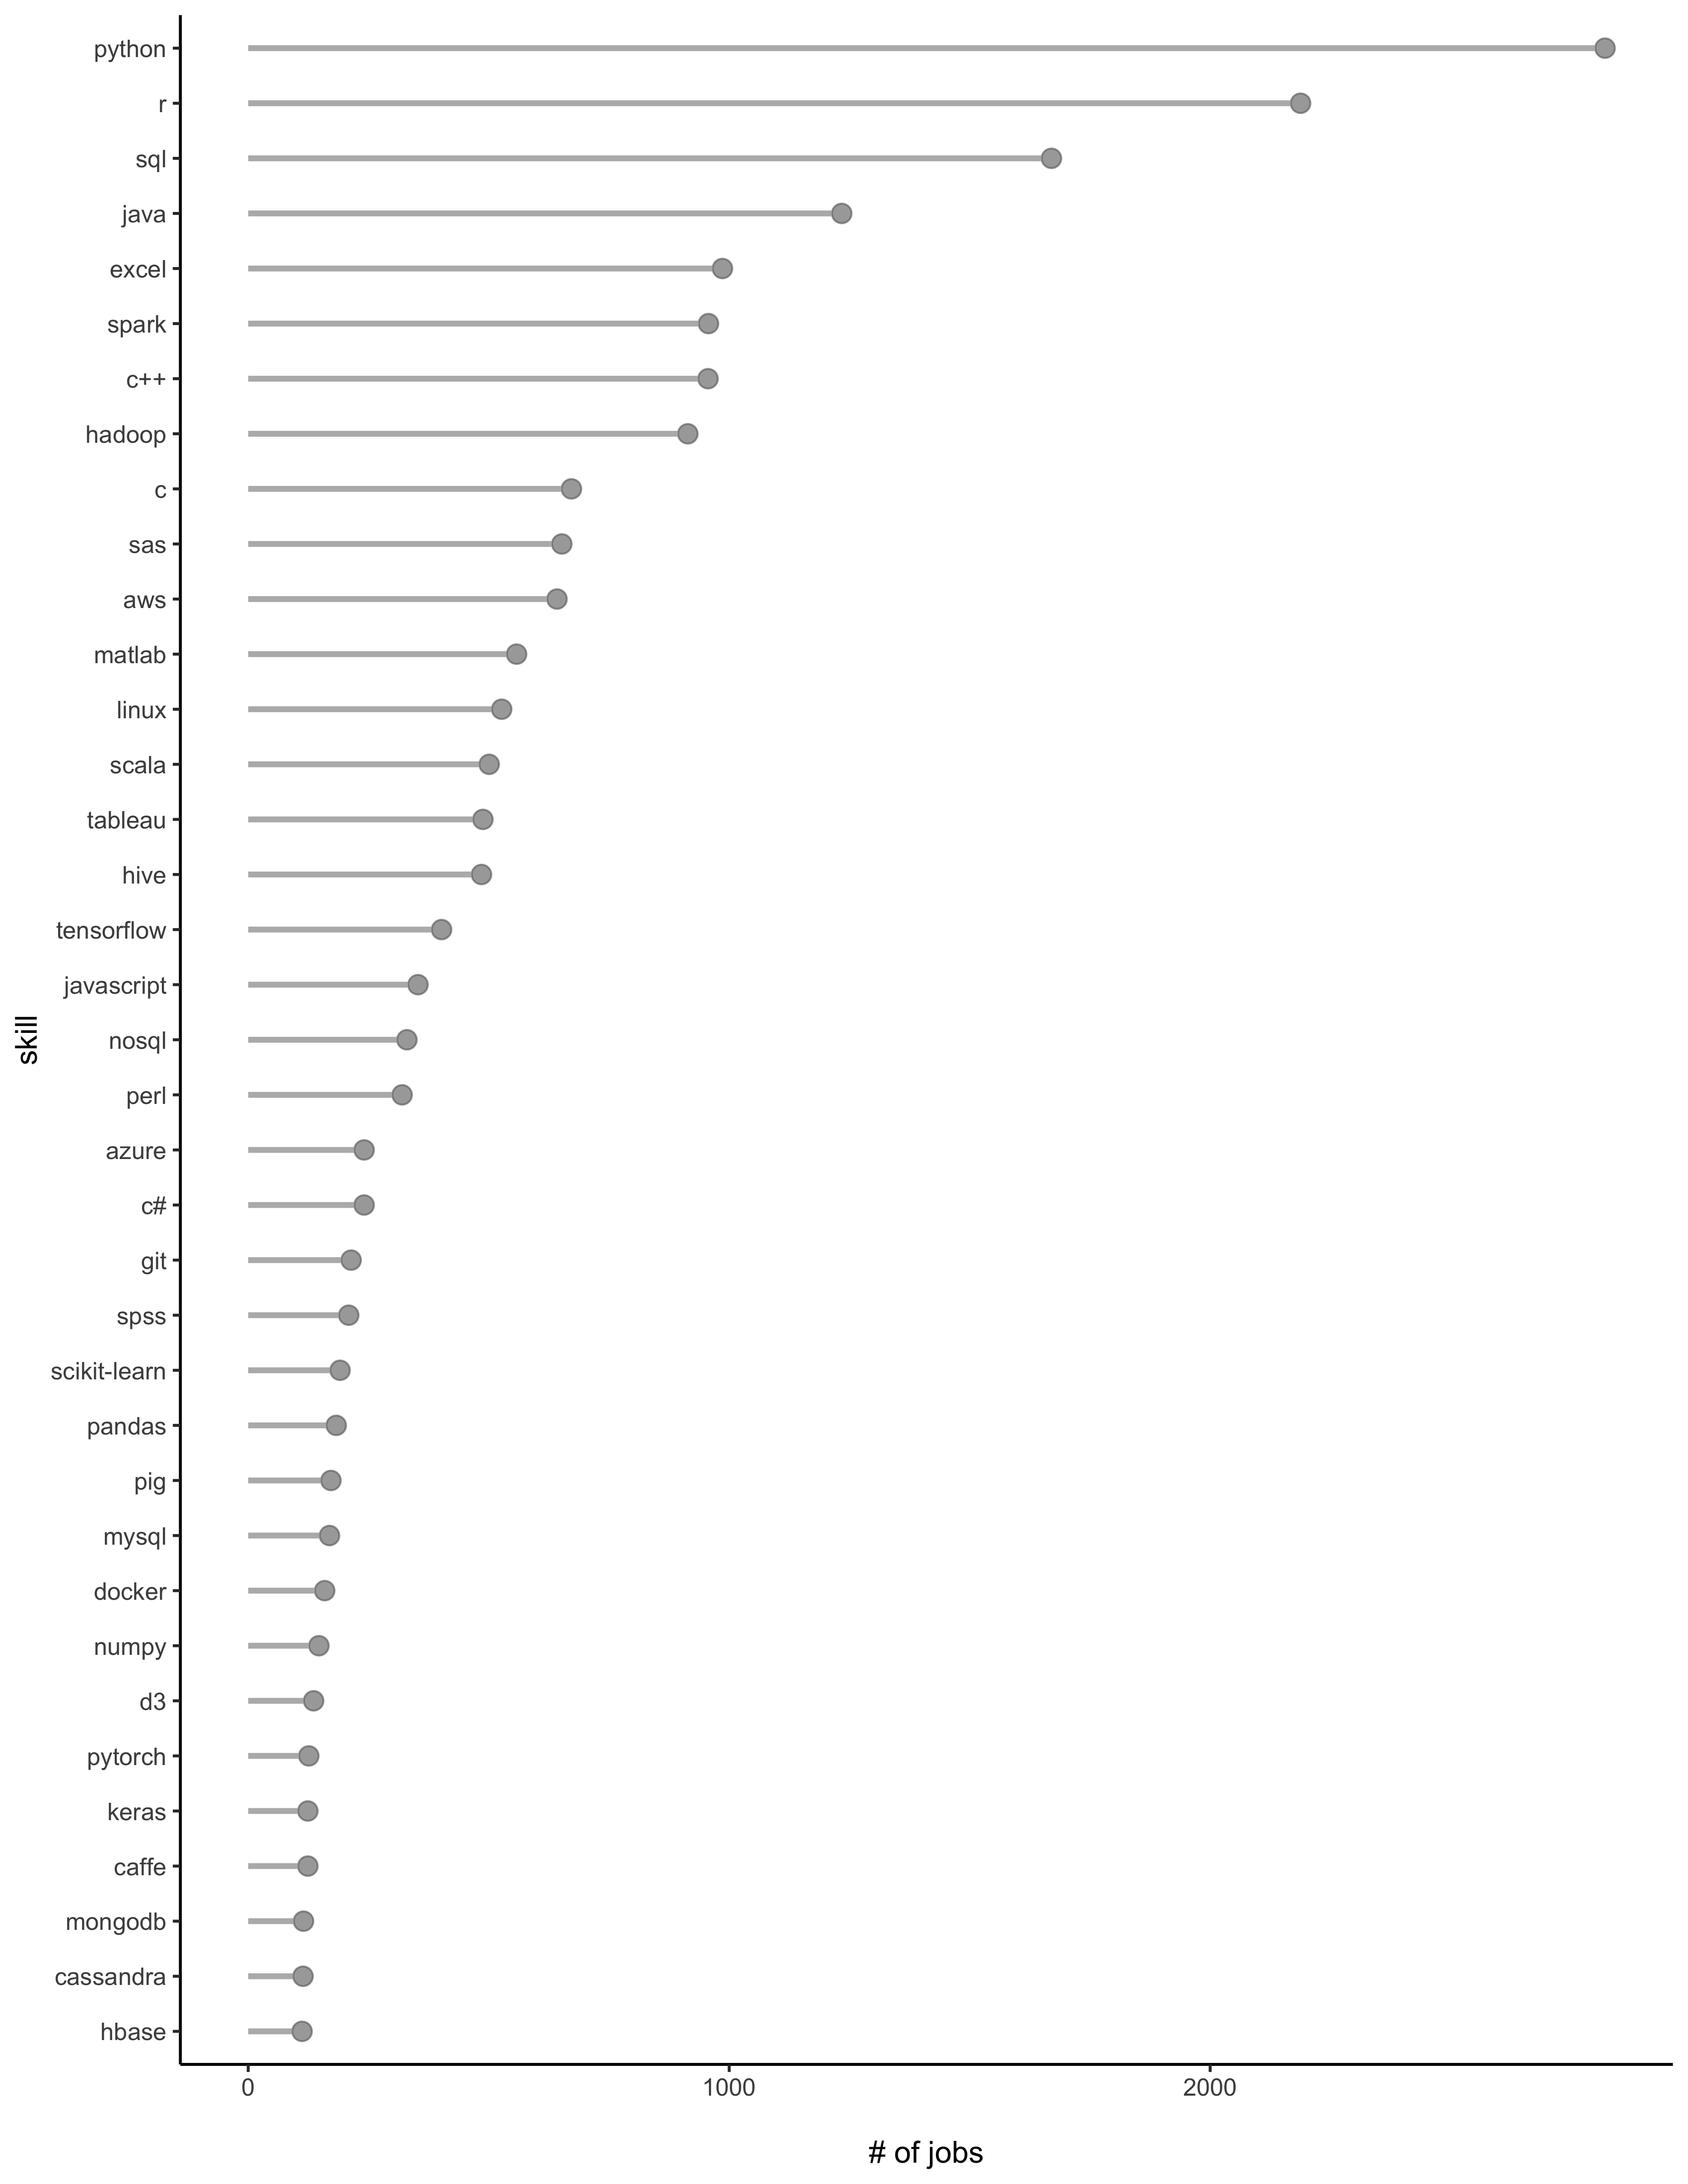

In [23]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_segment(aes(y=0, x=skill, xend=skill, yend=ct), data=software, color='grey40', size=1, alpha=0.5) +
geom_point(aes(x=skill, y=ct), data=software, size=3, color='white') + 
geom_point(aes(x=skill, y=ct), data=software, size=3, alpha=0.6, color='grey40') + 
ylab('\n# of jobs') +
theme_bw() + theme_minimal() + theme_classic() + coord_flip() + theme(legend.position='None')

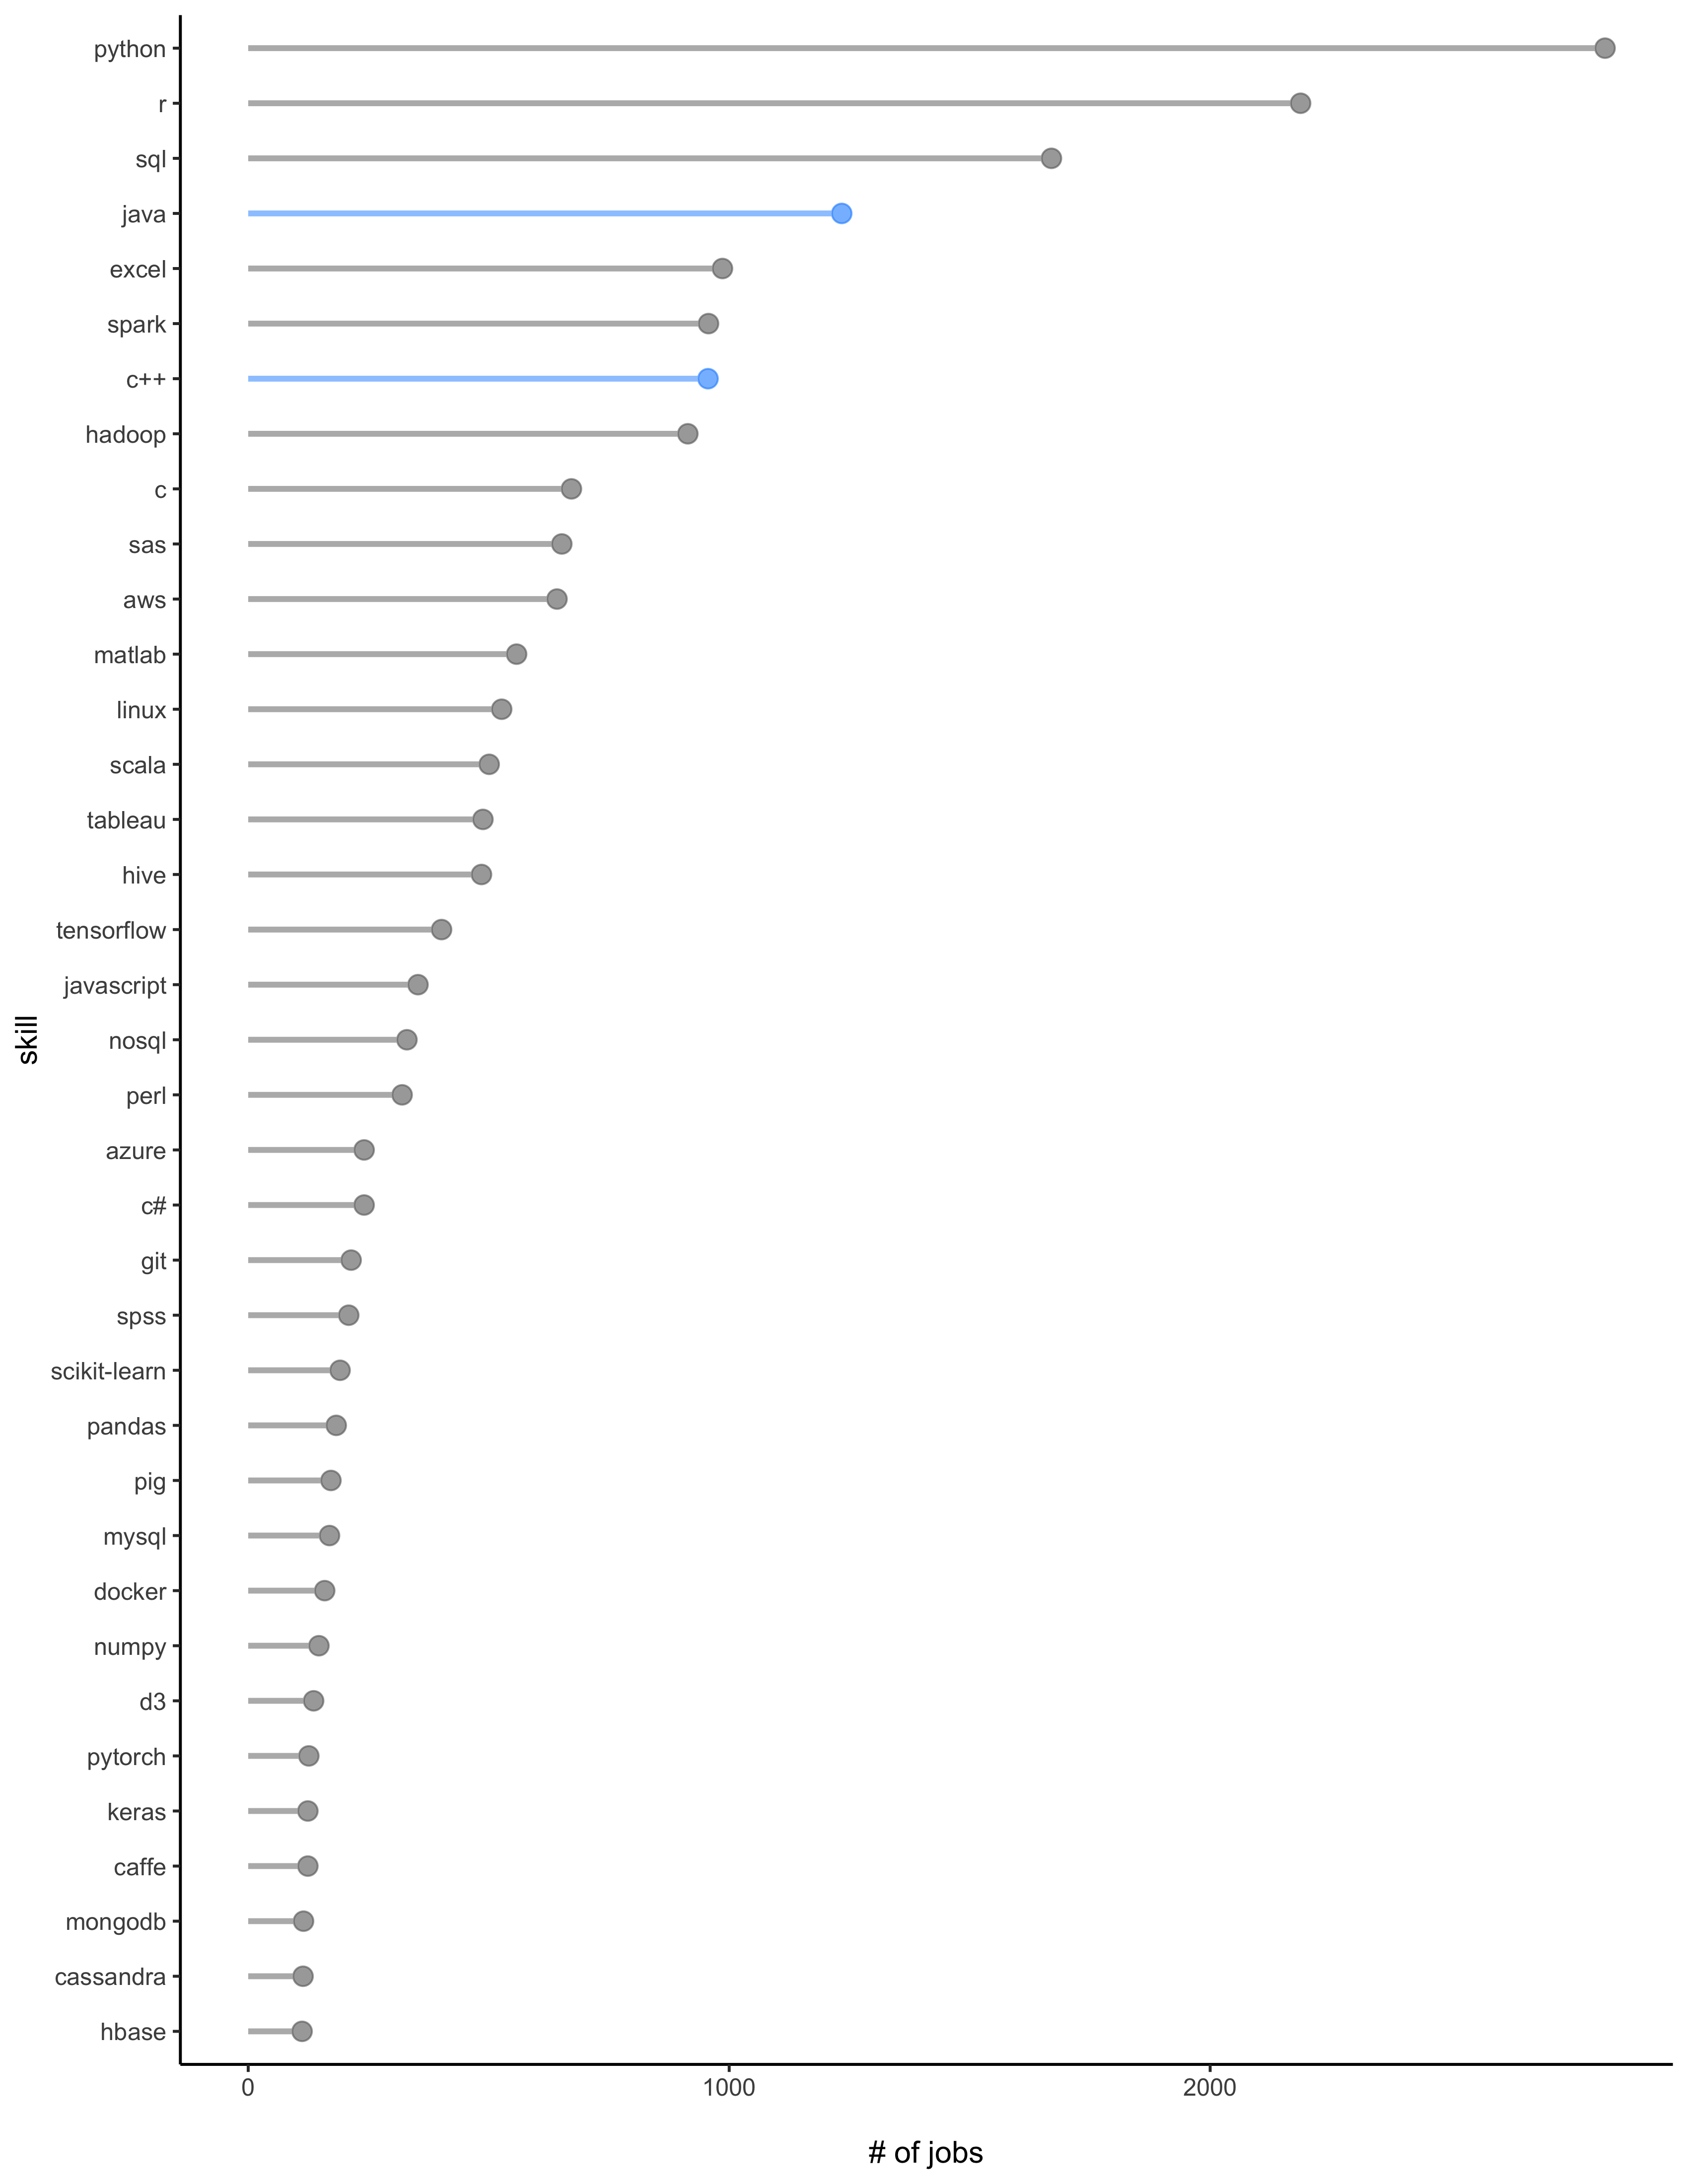

In [24]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_segment(aes(y=0, x=skill, xend=skill, yend=ct, color=engin_flag), data=software, size=1, alpha=0.5) +
geom_point(aes(x=skill, y=ct), data=software, size=3, color='white') + 
geom_point(aes(x=skill, y=ct, color=engin_flag), data=software, size=3, alpha=0.6) + 
scale_colour_manual(values = c('grey40', 'dodgerblue')) +
ylab('\n# of jobs') +
theme_bw() + theme_minimal() + theme_classic() + coord_flip() + theme(legend.position='None')

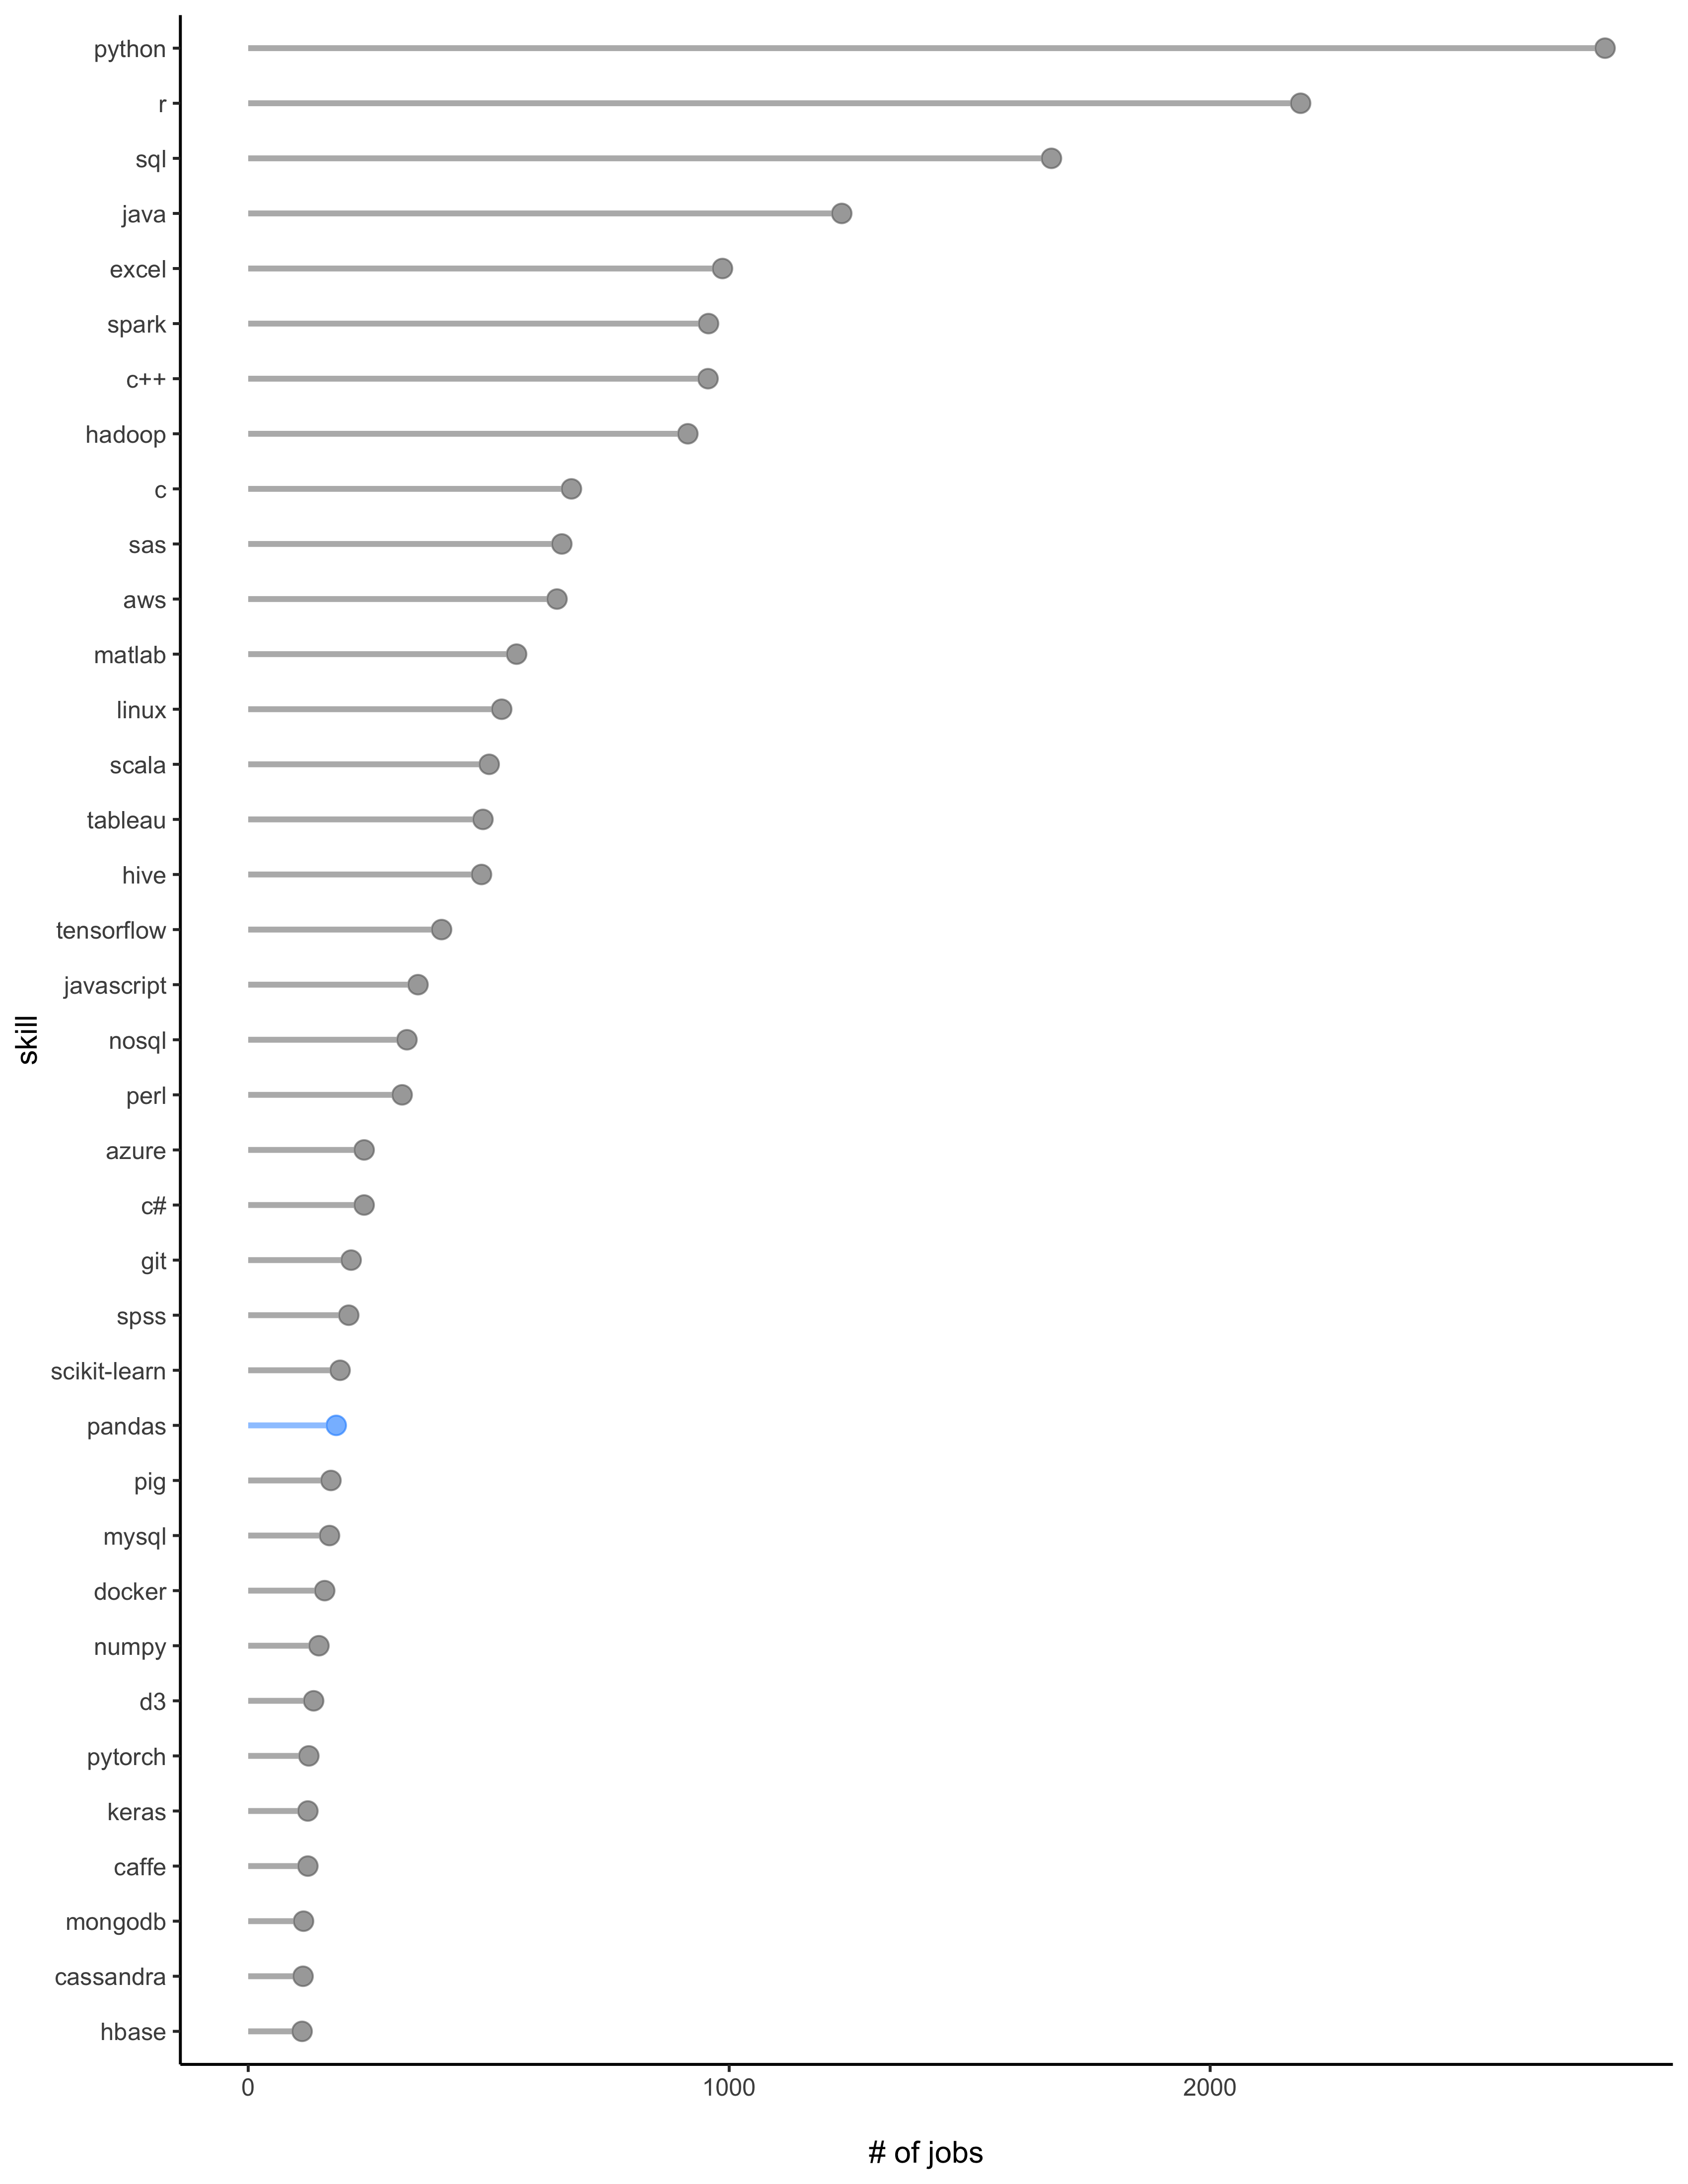

In [25]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_segment(aes(y=0, x=skill, xend=skill, yend=ct, color=implied_flag), data=software, size=1, alpha=0.5) +
geom_point(aes(x=skill, y=ct), data=software, size=3, color='white') + 
geom_point(aes(x=skill, y=ct, color=implied_flag), data=software, size=3, alpha=0.6) + 
scale_colour_manual(values = c('grey40', 'dodgerblue')) +
ylab('\n# of jobs') +
theme_bw() + theme_minimal() + theme_classic() + coord_flip() + theme(legend.position='None')

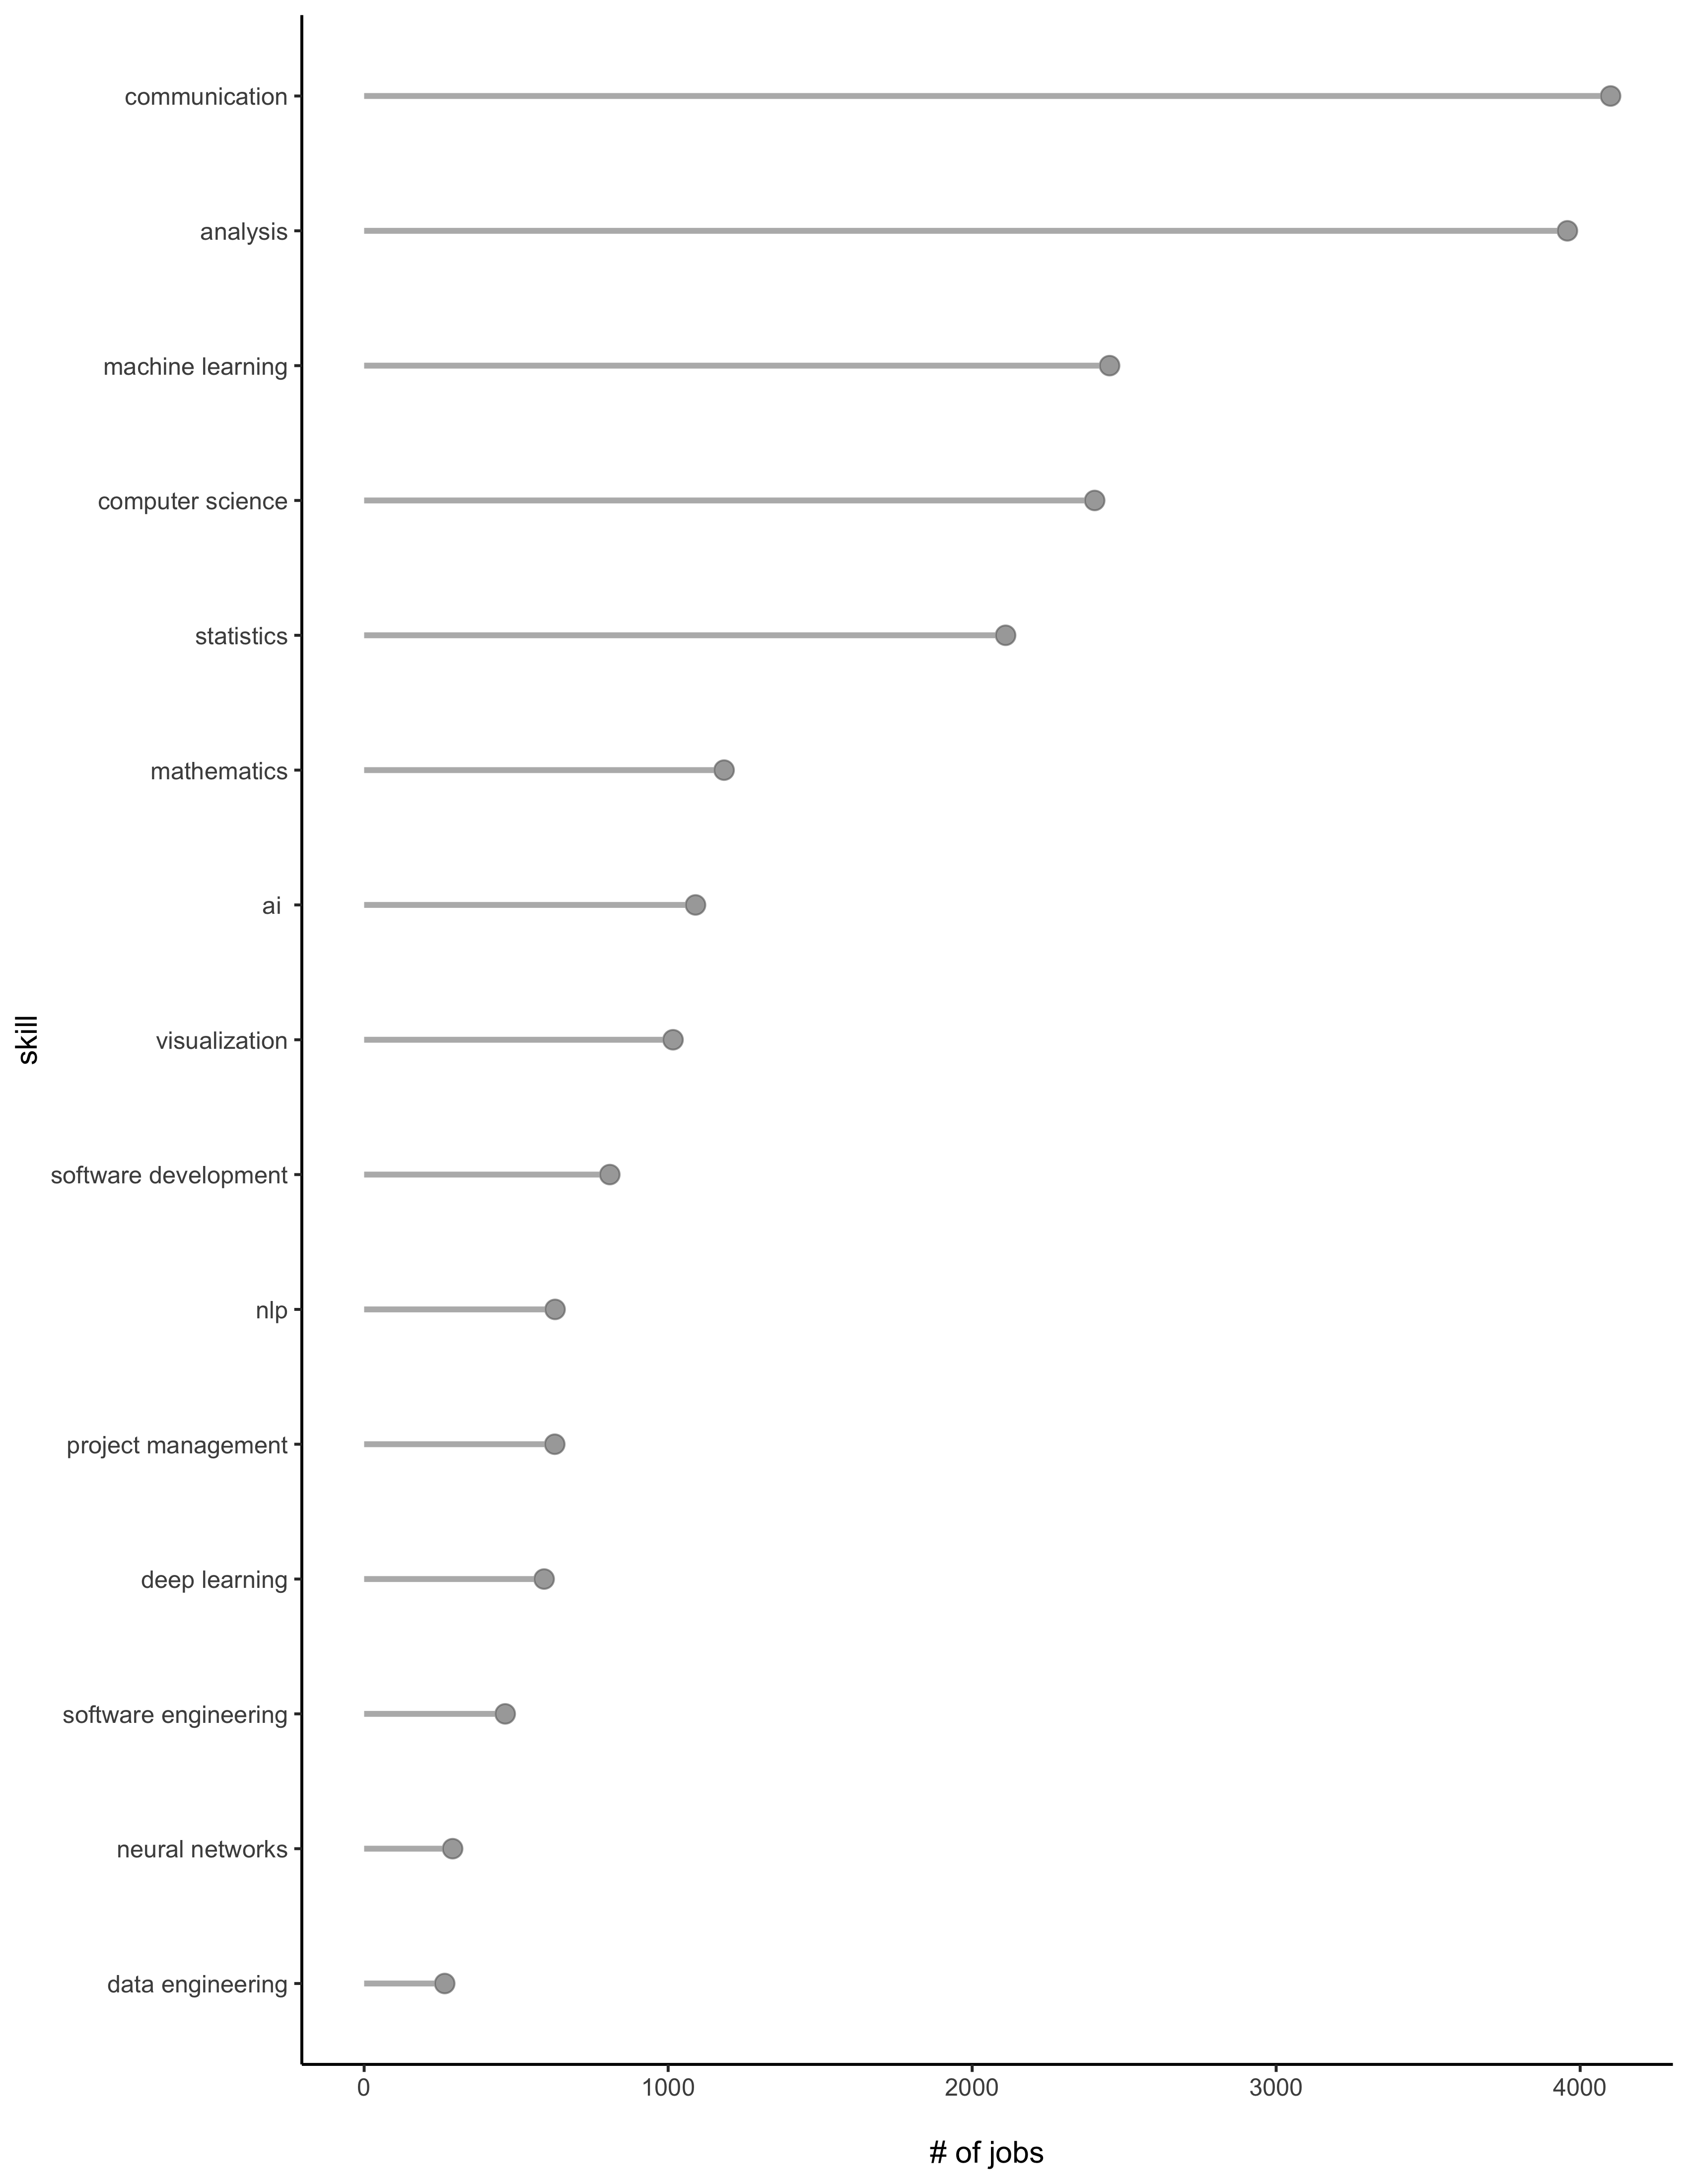

In [26]:
%%R -w 8.5 -h 11 --units in -r 400
ggplot() +
geom_segment(aes(y=0, x=skill, xend=skill, yend=ct), data=general, color='grey40', size=1, alpha=0.5) +
geom_point(aes(x=skill, y=ct), data=general, size=3, color='white') + 
geom_point(aes(x=skill, y=ct), data=general, size=3, alpha=0.6, color='grey40') + 
ylab('\n# of jobs') +
theme_bw() + theme_minimal() + theme_classic() + coord_flip() + theme(legend.position='None')

Started thinking about working on positions, realized I needed regular expression, will work on it tomorrow.

In [27]:
from collections import Counter
positions = data.position.dropna().map(str.lower)
positions = Counter(positions)
positions = pd.DataFrame.from_dict(positions, orient='index').reset_index()
positions.columns = ['position', 'ct']
positions = positions.sort_values('ct').reset_index(drop=True)
positions = positions.sort_values('ct', ascending=False)
print(positions.head())
%R -i positions

                       position   ct
5216             data scientist  355
5215      senior data scientist   98
5214           research analyst   66
5213              data engineer   63
5212  machine learning engineer   56


In [30]:
positions.to_csv('pos.csv', index=False)

In [31]:
positions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 5216 to 2608
Data columns (total 2 columns):
position    5217 non-null object
ct          5217 non-null int64
dtypes: int64(1), object(1)
memory usage: 122.3+ KB


In [1]:
import pandas as pd
indeed = pd.read_csv('indeed2019All.csv', encoding='latin-1')
t = indeed.groupby(['position', 'location', 'company']).sum()